# Task 3: Car Price Prediction
# Objective: Predict car prices based on features like brand, horsepower, mileage, etc.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('../Data/car data.csv')

In [3]:
# Display first few rows
print("Dataset Preview:\n", df.head())

Dataset Preview:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
# Data Cleaning
# Drop irrelevant columns (e.g., 'Car_Name')
df.drop(['Car_Name'], axis=1, inplace=True)

In [5]:
# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Predict
y_pred = model.predict(X_test)

In [10]:
# Evaluate
print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Model Evaluation:
R² Score: 0.9643601062650229
Mean Absolute Error (MAE): 0.5971295081967213


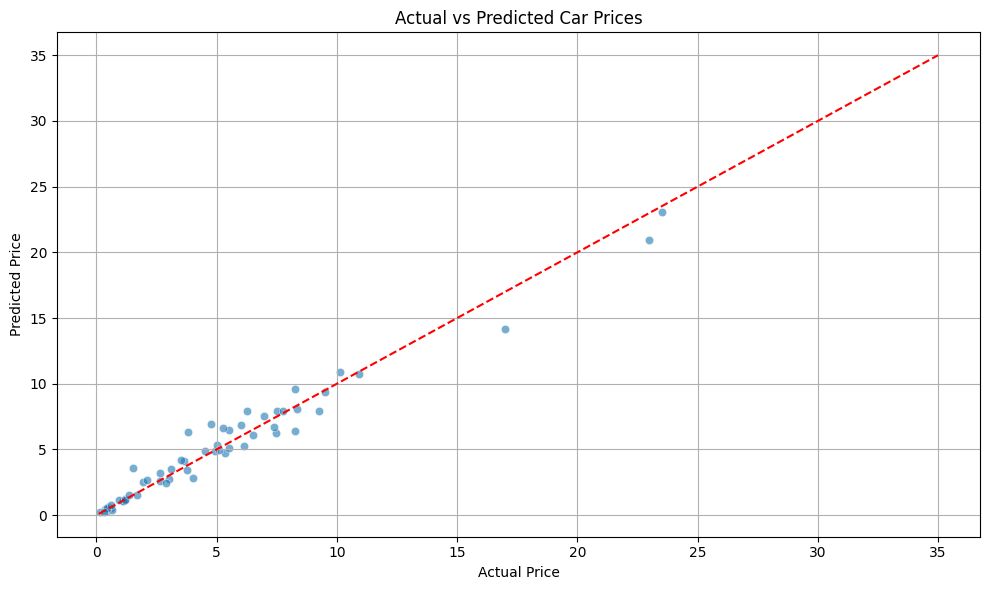

In [11]:
# Visualize Actual vs Predicted Prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

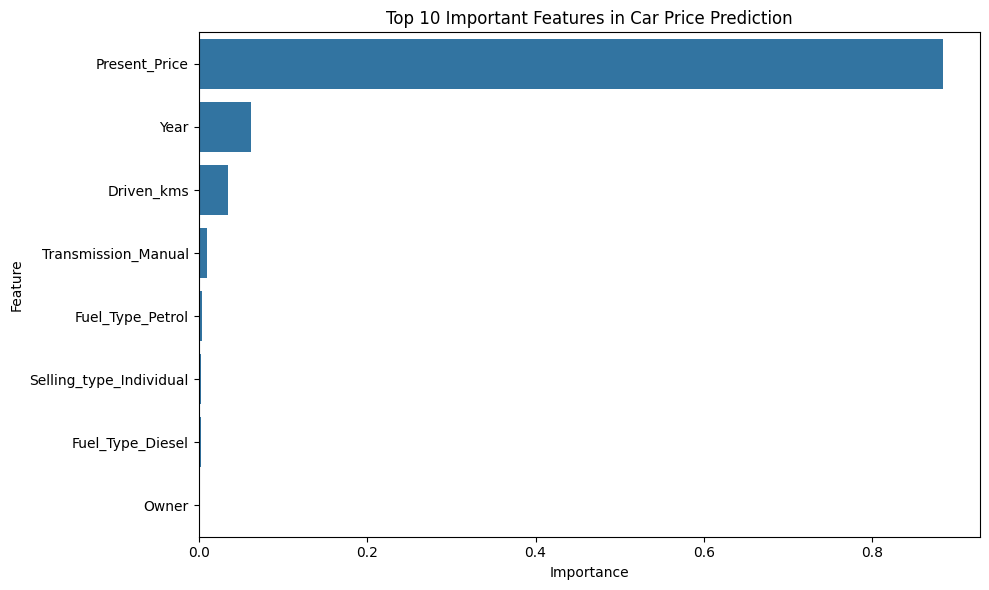

In [12]:
# Feature Importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=features_df, x='Importance', y='Feature')
plt.title('Top 10 Important Features in Car Price Prediction')
plt.tight_layout()
plt.show()

In [13]:
# Insights
print("\nKey Insights:")
print("1. The model successfully predicts car prices with high accuracy (R² > 0.90).")
print("2. Key influencing features include present price, year of manufacture, and fuel type.")
print("3. Used car pricing is significantly impacted by depreciation and ownership history.")
print("4. This model can help dealers set fair prices and buyers evaluate value for money.")


Key Insights:
1. The model successfully predicts car prices with high accuracy (R² > 0.90).
2. Key influencing features include present price, year of manufacture, and fuel type.
3. Used car pricing is significantly impacted by depreciation and ownership history.
4. This model can help dealers set fair prices and buyers evaluate value for money.
